# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [162]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [24]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [15]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [12]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


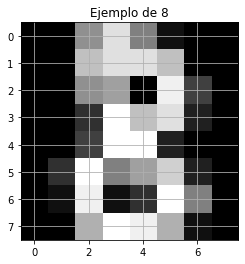

In [13]:
# Cargamos una muestra
plt.grid(True)

plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

## Punto 1 - aplicar PCA

In [29]:
#separamos para Train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)
print(f'Formato del X_train: {X_train.shape}')
print(f'Formato del y_train: {y_train.shape}')
print(f'Formato del X_test: {X_test.shape}')
print(f'Formato del x_train: {y_test.shape}')

Formato del X_train: (1257, 64)
Formato del y_train: (1257,)
Formato del X_test: (540, 64)
Formato del x_train: (540,)


In [112]:
X_norm = normalize(X_train)

In [185]:
pca = PCA(n_components=0.9, random_state=2).fit(X_norm)
X_pca = pca.transform(X_norm)
X_pca.shape

(1257, 21)

In [114]:
print(f'Se requieren {X_pca.shape[1]} componentes')

Se requieren 21 componentes


In [115]:
print('la varianza explicada para cada componente es:', pca.explained_variance_ratio_)

la varianza explicada para cada componente es: [0.155385   0.1407092  0.11510324 0.08371681 0.05976505 0.04997356
 0.04421854 0.03767338 0.03433682 0.02542953 0.02358644 0.02167896
 0.01852052 0.01629109 0.01448339 0.01428207 0.01305887 0.01072845
 0.0098706  0.00910999 0.00828714]


## Punto 2 - gráfica varianza contemplada

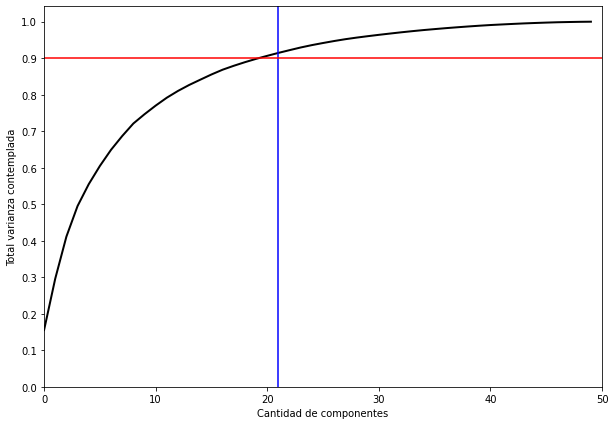

In [184]:
pca_2 = PCA(n_components=50, random_state=2).fit(X_norm)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 50)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

Vemos que con 21 componentes se alcanza a explicar un poco más del 90% de la varianza.

## Punto 4 - Imagen original vs reconstruída

In [156]:
proyeccion = pca.inverse_transform(X_pca)
proyeccion.shape

(1257, 64)

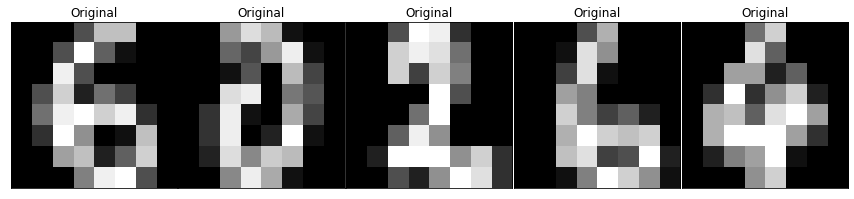

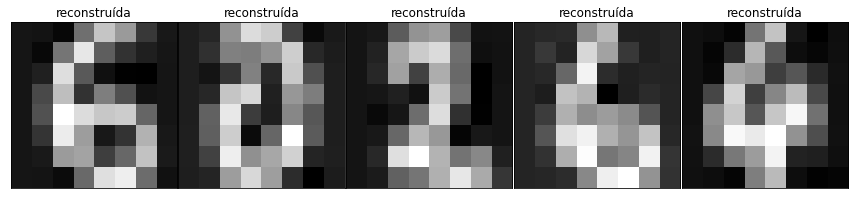

In [152]:
fix, axes = plt.subplots(1, 5, figsize = (15,8), subplot_kw = {'xticks' : [], 'yticks': []},
                     gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i , ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape((8, 8)), cmap='gray')
    ax.set_title('Original')
    
fix, axes = plt.subplots(1, 5, figsize = (15,8),subplot_kw = {'xticks' : [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i , ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(8,8), cmap = 'gray')
    ax.set_title('reconstruída')
    


## Punto 5 - Matriz de correlación

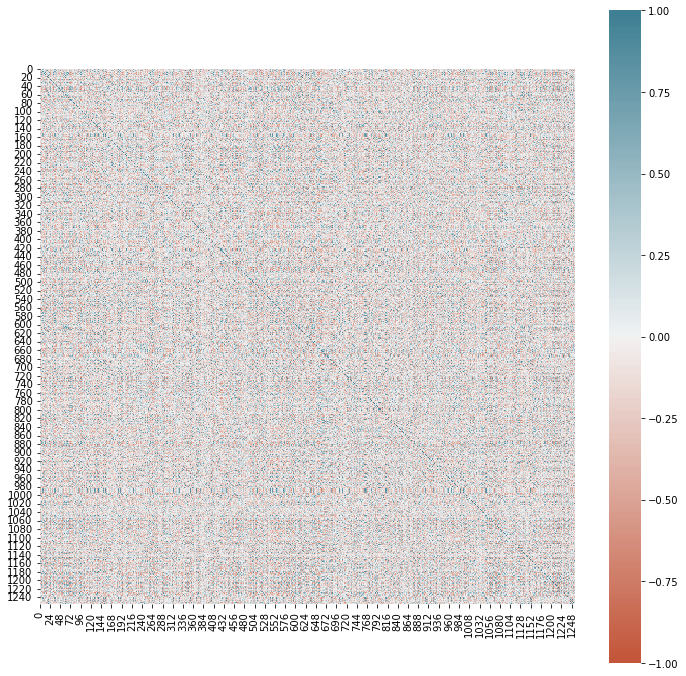

In [190]:
corr = np.corrcoef(X_pca)

plt.figure(figsize =(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

## Punto 6 - clusters por componentes

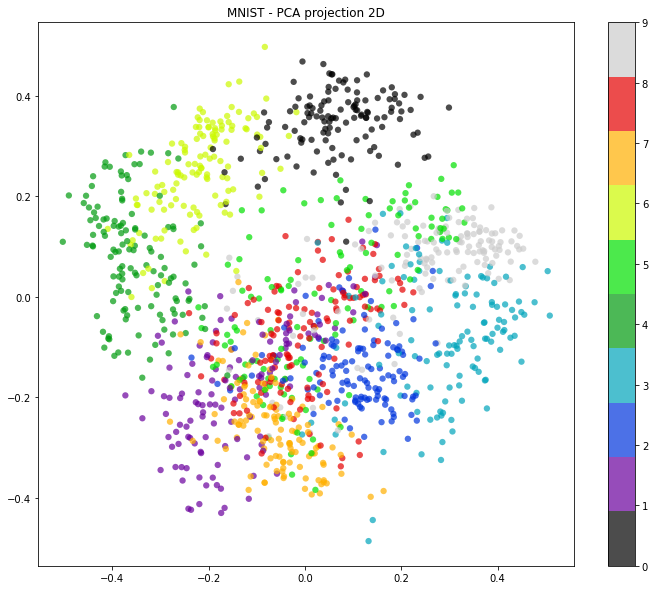

In [183]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST - PCA projection 2D');

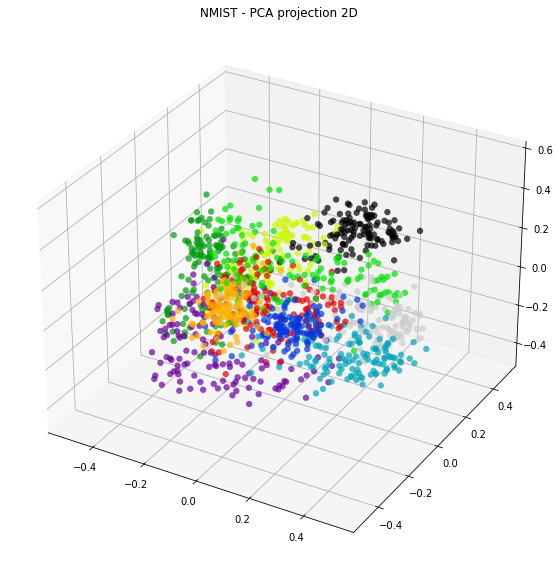

In [182]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 3], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('NMIST - PCA projection 2D');

## Punto 6 - clusters por k-means

In [221]:
clases = np.unique(y_train)
clases
n_clases = clases.size

kmeans = KMeans(n_clusters=n_clases, n_init=100, random_state=2)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_


[6 4 5 ... 7 5 9]


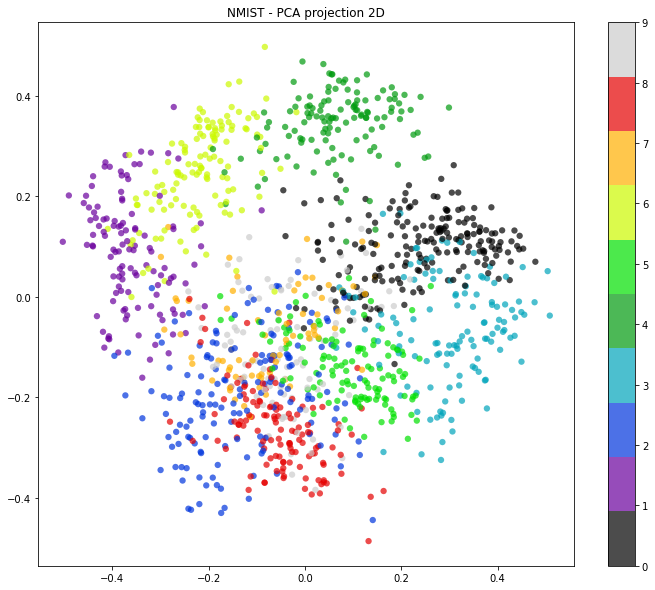

In [172]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('NMIST - PCA projection 2D');

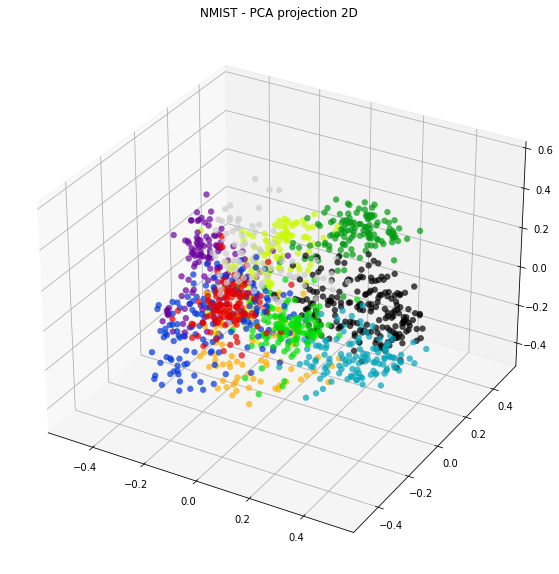

In [181]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 3], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('NMIST - PCA projection 2D');

La clusterización por k-means queda bastante parecida a la hecha con los componentes

## Punto 8 - gráfica de inercia

In [194]:
inertia = []
for k in range(1, n_clases + 1):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=2).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))
    
inertia

[18.786357341085786,
 17.551037960915476,
 16.521224405030587,
 15.81843725579044,
 15.165225657829911,
 14.623230566539839,
 14.192250315906106,
 13.787564850102696,
 13.383862026693777,
 13.102044732010224]

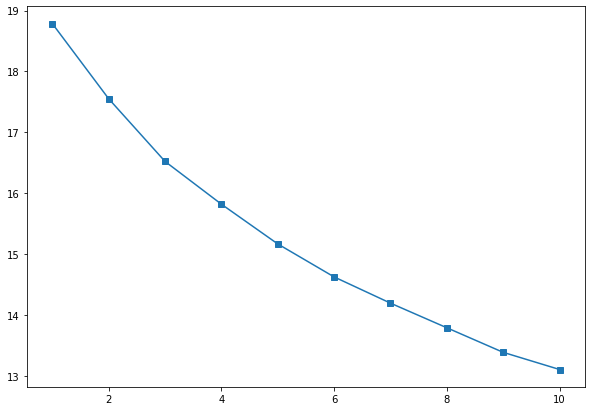

In [203]:
plt.figure(figsize = (10,7))
plt.plot(range(1, 11), inertia, marker='s')

## Punto 9 - análisis de cluster de un dígito

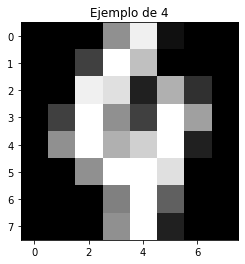

In [216]:
plt.title("Ejemplo de {}".format(y_train[8]))
plt.imshow(X_train[8, :].reshape((8, 8)), cmap='gray')

In [236]:
#seleccionamos los digitos clusterizados como 4

idx_4 = np.where(cluster_labels == 4)
X_pca_4 = X_pca[idx_4]
cluster_labels_4 = cluster_labels[idx_4]

print(X_pca_4.shape)

(126, 21)


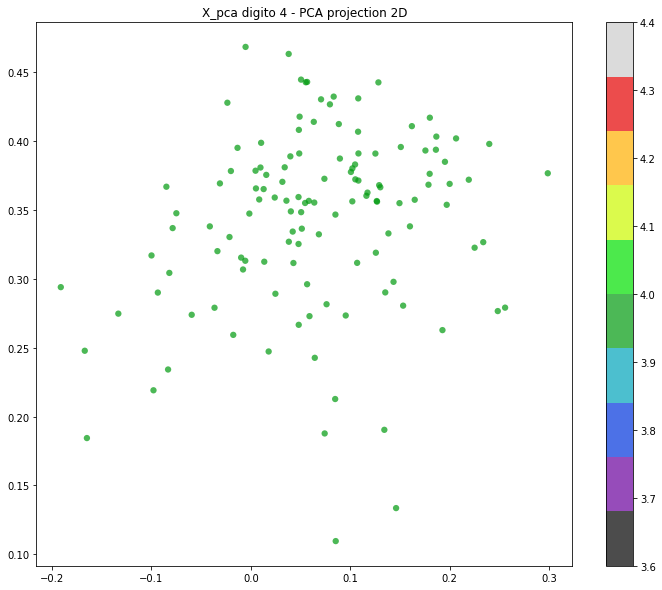

In [239]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_4[:, 0], X_pca_4[:, 1], c=cluster_labels_4, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('X_pca digito 4 - PCA projection 2D');

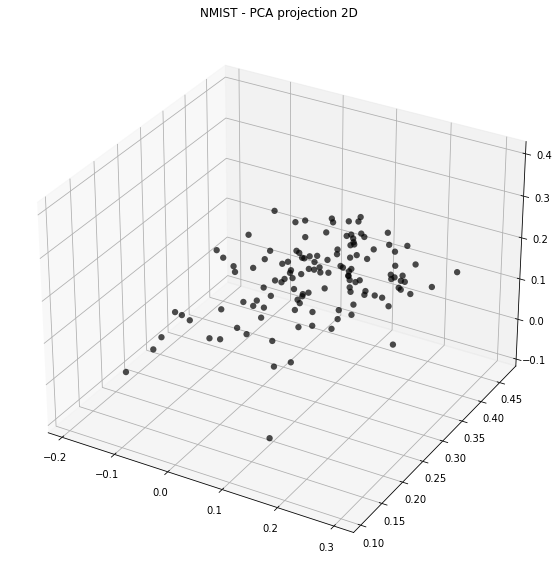

In [240]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_pca_4[:, 0], X_pca_4[:, 1], X_pca_4[:, 3], c=cluster_labels_4, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('NMIST - PCA projection 2D');

In [254]:
reconstruido = np.dot(X_pca_4[:,:2], pca.components_[:2,:])

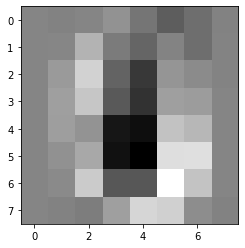

In [256]:
plt.imshow(reconstruido[10, :].reshape((8, 8)), cmap='gray')